## **HandsOn1** - Multimedia/IF4021
Dimas Dharma Wicaksono - 122140215
## AUDIO PROCESSING
Assignment ini berfokus pada topik Audio Processing yang menggunakan bahasa pemrograman python dengan menerapkan library - library python yang ada dan mencoba mengimplementasikan program - program untuk melakukan perintah seperti Menampilkan Waveform dan Spektogram, Menambahkan Fade in dan Fade out pada audio, Memberikan filter Highpass, lowpass dan Bandpass, Melakukan pitch Shifting, serta normalisasi audio dan loudnes optimization LUFS.
## Lampiran Link
Berikut beberapa link esensial dari project ini :
### Link Google Drive
https://drive.google.com/drive/folders/1slQ_aBMme62cpjh0hlMxsNEGakD8V3b3?usp=sharing 
### Link Kutipan AI
https://chat.qwen.ai/s/9d907b91-74da-4fef-8274-2f45514ce66e
### Link Github
https://github.com/HYPExREAL/multimedia_itera_122140215

## Soal 1 - Visualisasi **Waveform dan Spektogram**
Pada soal ini diminta untuk merekam audio berbicara dengan kondisi yang berbeda - beda dalam rentang 5 menit

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Load audio file (ganti dengan path file audio Anda)
audio_path = 'Soal1-Audio.wav'
y, sr = librosa.load(audio_path)  # y: sinyal audio, sr: frekuensi sampling

print(f"Frekuensi Sampling (sr): {sr} Hz")
print(f"Durasi Audio: {len(y) / sr:.2f} detik")

Visualisasi telah disimpan di: Soal1-Waveform.png


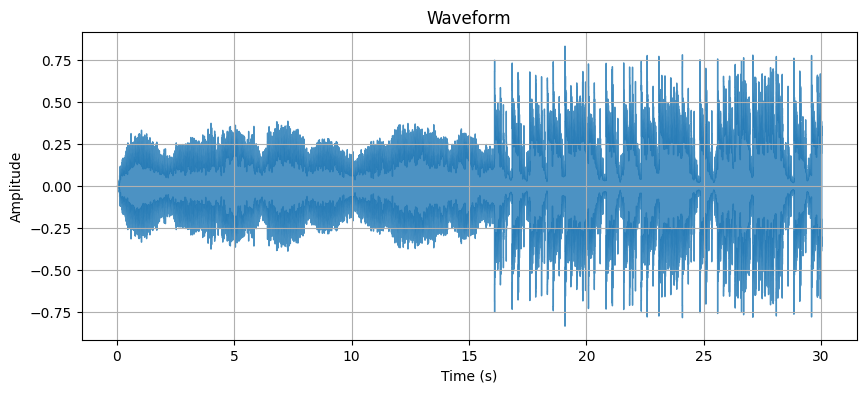

In [7]:
# Menampilkan Wavefrom
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.8)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Menyimpan visualisasi sebagai file gambar
output_path = 'Soal1-Waveform.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Visualisasi telah disimpan di: {output_path}")

plt.show()

Visualisasi telah disimpan di: Soal1-Spektogram.png


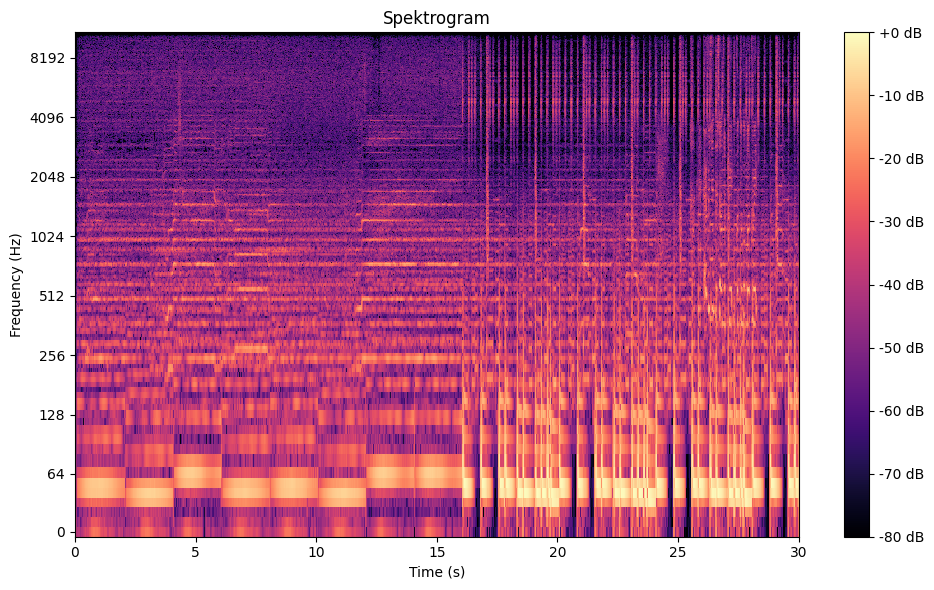

In [8]:
# Compute Short-Time Fourier Transform (STFT)
D = librosa.stft(y)  # STFT dari sinyal audio
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # Konversi ke dB skala

# Plot spektrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')  # Tambahkan colorbar untuk skala dB
plt.title('Spektrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()

# Menyimpan visualisasi sebagai file gambar
output_path = 'Soal1-Spektogram.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Visualisasi telah disimpan di: {output_path}")

plt.show()

### Penjelasan Soal 1
**Waveform** Waveform adalah representasi visual dari sinyal audio dalam domain waktu. Ini menunjukkan bagaimana amplitudo (tinggi rendahnya gelombang suara) berubah seiring waktu. Dengan menggunakan kode di atas maka akan menampilkan dan menyimpan bentuk gelombang audio (waveform) sebagai grafik dengan grid, label, dan judul yang jelas.

**Spektogram** Spektogram representasi visual dari spektrum frekuensi sinyal audio seiring waktu. Ini menunjukkan bagaimana intensitas (atau energi) dari berbagai frekuensi dalam sinyal audio berubah selama durasi rekaman. Dengan menggunakan kode di atas maka akan menampilkan selain bentuk juga warna sebagai representasi frekuensi gelombang.

## Soal 2 - Menambahkan efek **Fade in dan Fade Out**
Pada soal ini diminta untuk menambahkan efek Fade in dan Fade out pada suatu file audio

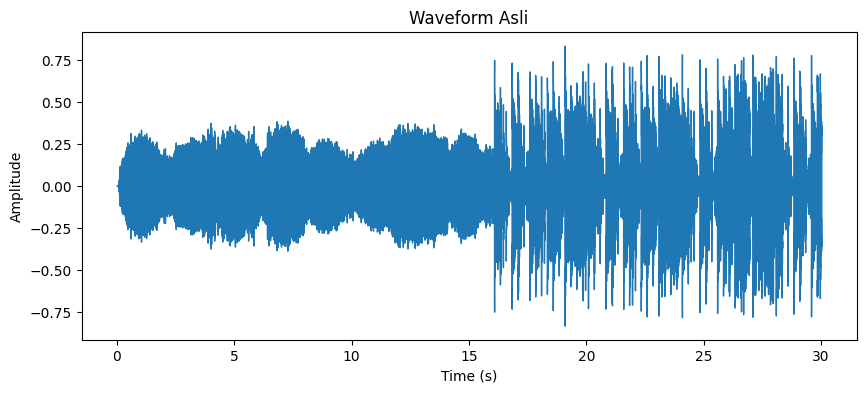

In [9]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Load audio file (ganti dengan path file audio Anda)
audio_path = 'Soal2-Audio.wav'
y, sr = librosa.load(audio_path)

# Plot waveform asli
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform Asli')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

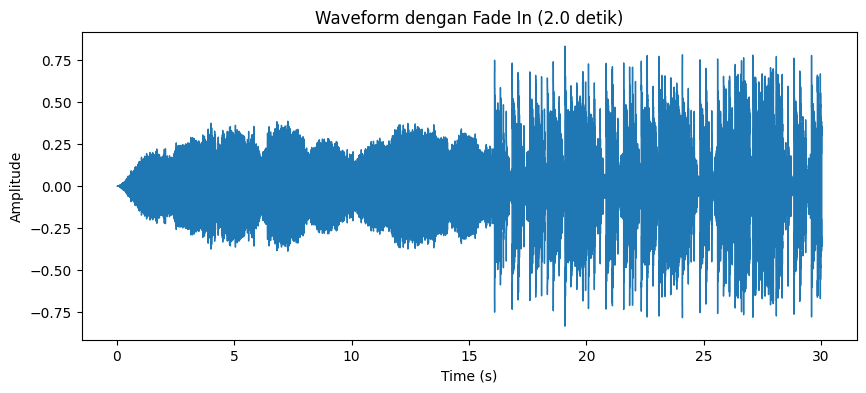

In [10]:
def apply_fade_in(data, sr, fade_duration):
    fade_samples = int(fade_duration * sr)  # Hitung jumlah sampel untuk fade in
    fade_curve = np.linspace(0, 1, fade_samples)  # Buat kurva linear dari 0 ke 1
    faded_data = np.copy(data)
    faded_data[:fade_samples] *= fade_curve  # Terapkan kurva ke bagian awal
    return faded_data

fade_in_duration = 2.0  # Durasi fade in dalam detik
y_fade_in = apply_fade_in(y, sr, fade_in_duration)

# Plot waveform setelah fade in
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_fade_in, sr=sr)
plt.title(f'Waveform dengan Fade In ({fade_in_duration} detik)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### Penjelasan Penambahan Efek **Fade In**
Untuk menambahkan efek fade in bisa dilakukan dengan membuat fungsi *apply_fade_in* untuk menerapkan efek **fade in** pada sinyal audio. Fade in adalah proses memudarkan suara dari senyap (amplitudo 0) hingga mencapai volume penuh secara bertahap selama durasi tertentu (`fade_duration`). Fungsi ini menghitung jumlah sampel yang sesuai dengan durasi fade in, membuat kurva linear menggunakan `np.linspace` (dari 0 ke 1), lalu mengalikan bagian awal sinyal audio dengan kurva tersebut untuk menghasilkan efek fade in. Output grafik menunjukkan bahwa amplitudo audio naik secara bertahap dari 0 selama 2 detik pertama, kemudian stabil di volume normal setelahnya.

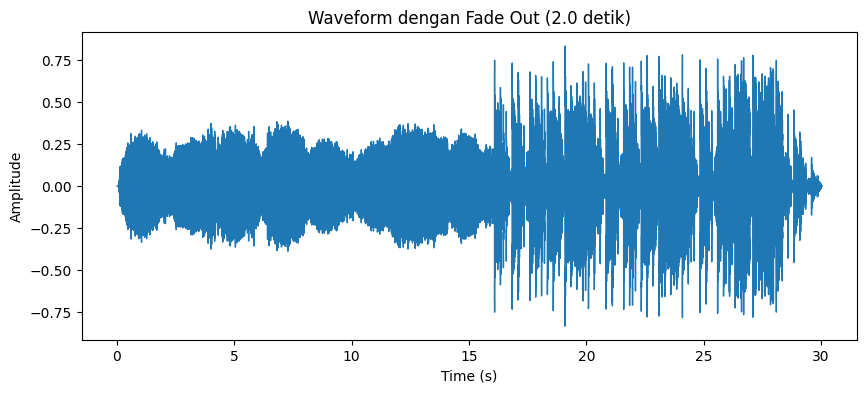

In [63]:
def apply_fade_out(data, sr, fade_duration):
    fade_samples = int(fade_duration * sr)  # Hitung jumlah sampel untuk fade out
    fade_curve = np.linspace(1, 0, fade_samples)  # Buat kurva linear dari 1 ke 0
    faded_data = np.copy(data)
    faded_data[-fade_samples:] *= fade_curve  # Terapkan kurva ke bagian akhir
    return faded_data

# Terapkan fade out selama 2 detik
fade_out_duration = 2.0  # Durasi fade out dalam detik
y_fade_out = apply_fade_out(y, sr, fade_out_duration)

# Plot waveform setelah fade out
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_fade_out, sr=sr)
plt.title(f'Waveform dengan Fade Out ({fade_out_duration} detik)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### Penjelasan Penambahan Efek **Fade Out**
Untuk menambahkan efek Fade Out bisa dilakukan dengan membuat fungsi *apply_fade_out* untuk menerapkan efek **fade out** pada sinyal audio. Fade out adalah proses memudarkan suara dari volume penuh (amplitudo maksimal) hingga senyap (amplitudo 0) secara bertahap selama durasi tertentu (`fade_duration`). Fungsi ini menghitung jumlah sampel yang sesuai dengan durasi fade out, membuat kurva linear menggunakan `np.linspace` (dari 1 ke 0), lalu mengalikan bagian akhir sinyal audio dengan kurva tersebut untuk menghasilkan efek fade out. Output grafik menunjukkan bahwa amplitudo audio menurun secara bertahap menjadi 0 selama 2 detik terakhir, menciptakan transisi halus menuju senyap di akhir audio.

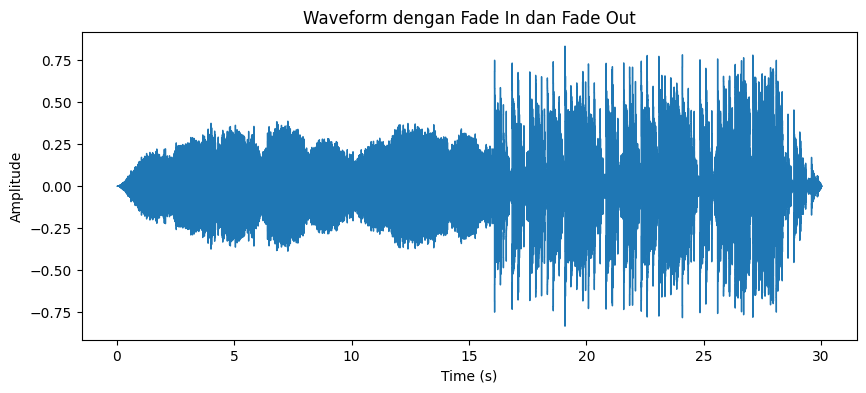

In [64]:
# Gabungkan fade in dan fade out
y_fade_in_out = apply_fade_in(y, sr, fade_in_duration)
y_fade_in_out = apply_fade_out(y_fade_in_out, sr, fade_out_duration)

# Plot waveform dengan fade in dan fade out
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_fade_in_out, sr=sr)
plt.title(f'Waveform dengan Fade In dan Fade Out')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [65]:
import soundfile as sf

# Simpan hasil audio dengan fade in dan fade out
output_path = 'Soal2-Audio_fade.wav'
sf.write(output_path, y_fade_in_out, sr)
print(f"Audio telah disimpan di: {output_path}")

Audio telah disimpan di: Soal2-Audio_fade.wav


### Penjelasan Tambahan
Dengan menambahkan efek fade in dan fade out dalam audio membuat intro dan outro menjadi lebih halus, dari output grafik yang dihasilkan bisa dilihat jelas dalam 2 detik pertama dan akhir terjadi kenaikan dan penurunan kurva yang menandakan audio naik secara progresif menuju keras di awal dan turun secara progresif menuju pelan di akhir

## Soal 3 - Menambahkan Filter **Highpass, Lowpass dan Bandpass**
Pada soal ini diminta untuk menambahkan 3 filter ke dalam audio file

In [68]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from scipy.signal import butter, filtfilt

# Load audio file (ganti dengan path file audio Anda)
audio_path = 'Soal3-Audio.wav'
y, sr = librosa.load(audio_path)  # y: sinyal audio, sr: frekuensi sampling

print(f"Frekuensi Sampling (sr): {sr} Hz")
print(f"Durasi Audio: {len(y) / sr:.2f} detik")

Frekuensi Sampling (sr): 22050 Hz
Durasi Audio: 10.37 detik


In [69]:
# Membuat Fungsi Filter (Low Pass, High Pass, dan Band Pass)
def apply_filter(data, sr, filter_type, cutoff_low=None, cutoff_high=None, order=5):
    nyquist = 0.5 * sr
    
    if filter_type == 'highpass':
        normal_cutoff = cutoff_low / nyquist
        b, a = butter(order, normal_cutoff, btype='high', analog=False)
    elif filter_type == 'lowpass':
        normal_cutoff = cutoff_high / nyquist
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
    elif filter_type == 'bandpass':
        normal_cutoff_low = cutoff_low / nyquist
        normal_cutoff_high = cutoff_high / nyquist
        b, a = butter(order, [normal_cutoff_low, normal_cutoff_high], btype='band', analog=False)
    else:
        raise ValueError("Filter type tidak valid. Pilih 'highpass', 'lowpass', atau 'bandpass'.")
    
    filtered_data = filtfilt(b, a, data)
    return filtered_data

### Penjelasan Kode
Kode ini mendefinisikan fungsi `apply_filter` untuk menerapkan filter digital pada sinyal audio menggunakan filter Butterworth. Fungsi ini mendukung tiga jenis filter : highpass (melewatkan frekuensi tinggi), lowpass (melewatkan frekuensi rendah), dan bandpass (melewatkan rentang frekuensi tertentu). Frekuensi cutoff (batas filter) dinormalisasi terhadap frekuensi Nyquist (setengah dari sample rate). Outputnya adalah sinyal audio yang telah difilter sesuai dengan parameter yang diberikan, misalnya hanya melewatkan frekuensi tertentu atau menghilangkan noise di luar rentang frekuensi yang diinginkan.

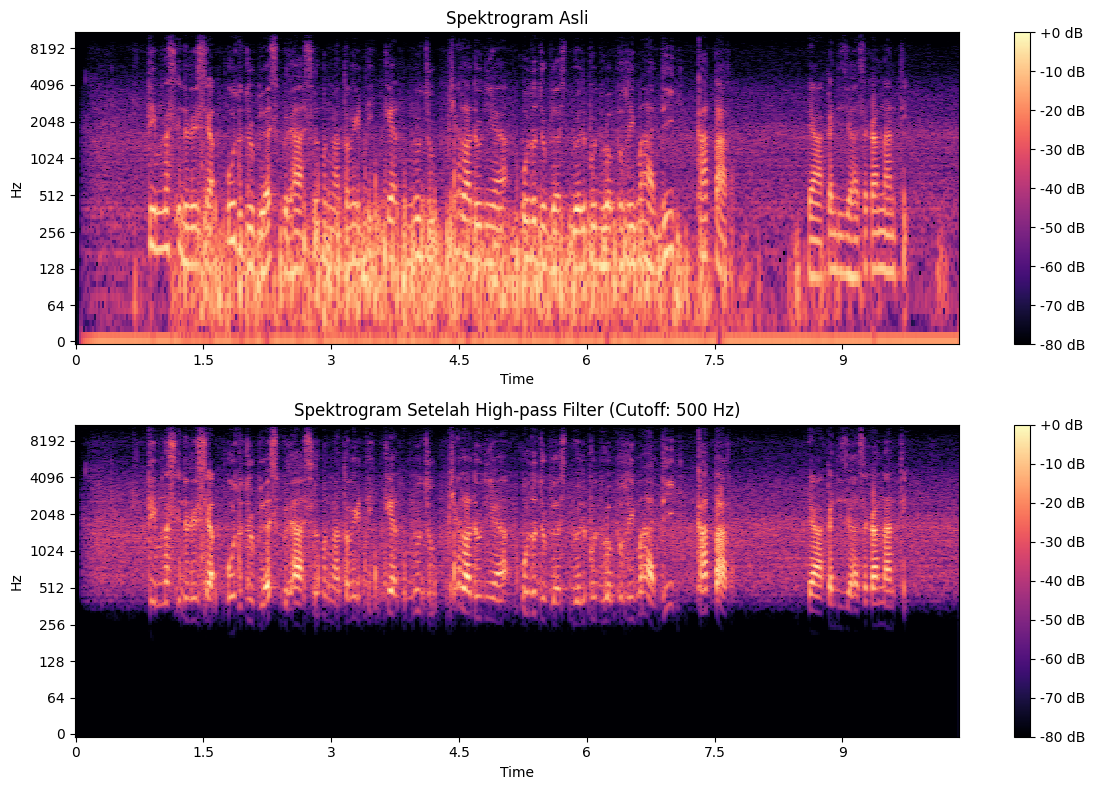

In [70]:
# Eksperimen dengan High Pass Filter
# Terapkan high-pass filter dengan cutoff 500 Hz
cutoff_highpass = 500
y_highpass = apply_filter(y, sr, filter_type='highpass', cutoff_low=cutoff_highpass)

# Plot spektrogram sebelum dan sesudah filter
plt.figure(figsize=(12, 8))

D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
D_highpass = librosa.amplitude_to_db(np.abs(librosa.stft(y_highpass)), ref=np.max)

plt.subplot(2, 1, 1)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram Asli')

plt.subplot(2, 1, 2)
librosa.display.specshow(D_highpass, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spektrogram Setelah High-pass Filter (Cutoff: {cutoff_highpass} Hz)')

plt.tight_layout()
plt.show()

In [71]:
import soundfile as sf

# Simpan hasil high-pass filter ke file baru
output_highpass_path = 'Soal3-Audio_HighpassFilter.wav'
sf.write(output_highpass_path, y_highpass, sr)
print(f"Audio hasil high-pass filter telah disimpan di: {output_highpass_path}")

Audio hasil high-pass filter telah disimpan di: Soal3-Audio_HighpassFilter.wav


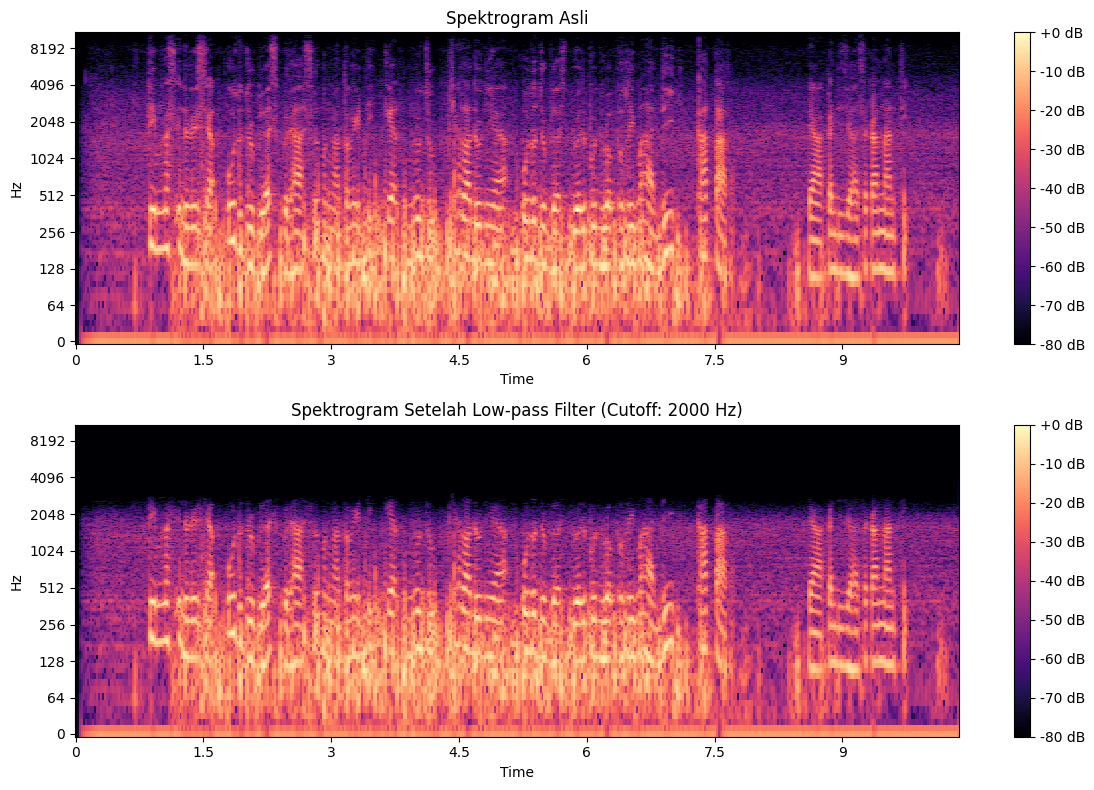

In [72]:
# Eksperimen dengan Low Pass Filter
# Terapkan low-pass filter dengan cutoff 2000 Hz
cutoff_lowpass = 2000
y_lowpass = apply_filter(y, sr, filter_type='lowpass', cutoff_high=cutoff_lowpass)

# Plot spektrogram sebelum dan sesudah filter
plt.figure(figsize=(12, 8))

D_lowpass = librosa.amplitude_to_db(np.abs(librosa.stft(y_lowpass)), ref=np.max)

plt.subplot(2, 1, 1)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram Asli')

plt.subplot(2, 1, 2)
librosa.display.specshow(D_lowpass, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spektrogram Setelah Low-pass Filter (Cutoff: {cutoff_lowpass} Hz)')

plt.tight_layout()
plt.show()

In [73]:
# Simpan hasil low-pass filter ke file baru
output_lowpass_path = 'Soal3-Audio_LowpassFilter.wav'
sf.write(output_lowpass_path, y_lowpass, sr)
print(f"Audio hasil low-pass filter telah disimpan di: {output_lowpass_path}")

Audio hasil low-pass filter telah disimpan di: Soal3-Audio_LowpassFilter.wav


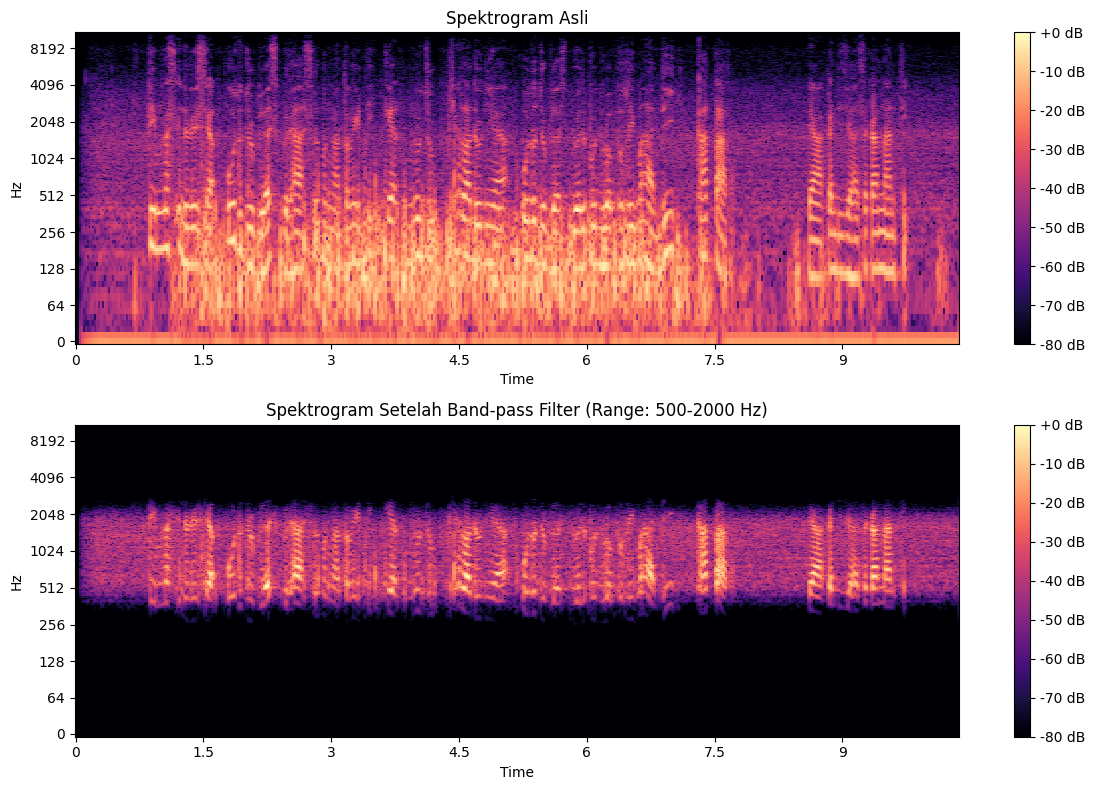

In [74]:
# Eksperimen dengan Band-pass Filter
# Terapkan band-pass filter dengan range 500-2000 Hz
cutoff_low_bandpass = 500
cutoff_high_bandpass = 2000
y_bandpass = apply_filter(y, sr, filter_type='bandpass', cutoff_low=cutoff_low_bandpass, cutoff_high=cutoff_high_bandpass)

# Plot spektrogram sebelum dan sesudah filter
plt.figure(figsize=(12, 8))

D_bandpass = librosa.amplitude_to_db(np.abs(librosa.stft(y_bandpass)), ref=np.max)

plt.subplot(2, 1, 1)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram Asli')

plt.subplot(2, 1, 2)
librosa.display.specshow(D_bandpass, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spektrogram Setelah Band-pass Filter (Range: {cutoff_low_bandpass}-{cutoff_high_bandpass} Hz)')

plt.tight_layout()
plt.show()

In [75]:
# Simpan hasil band-pass filter ke file baru
output_bandpass_path = 'Soal3-Audio_BandpassFilter.wav'
sf.write(output_bandpass_path, y_bandpass, sr)
print(f"Audio hasil band-pass filter telah disimpan di: {output_bandpass_path}")

Audio hasil band-pass filter telah disimpan di: Soal3-Audio_BandpassFilter.wav


Visualisasi spektrogram telah disimpan di: Soal3-Visualisasi.png


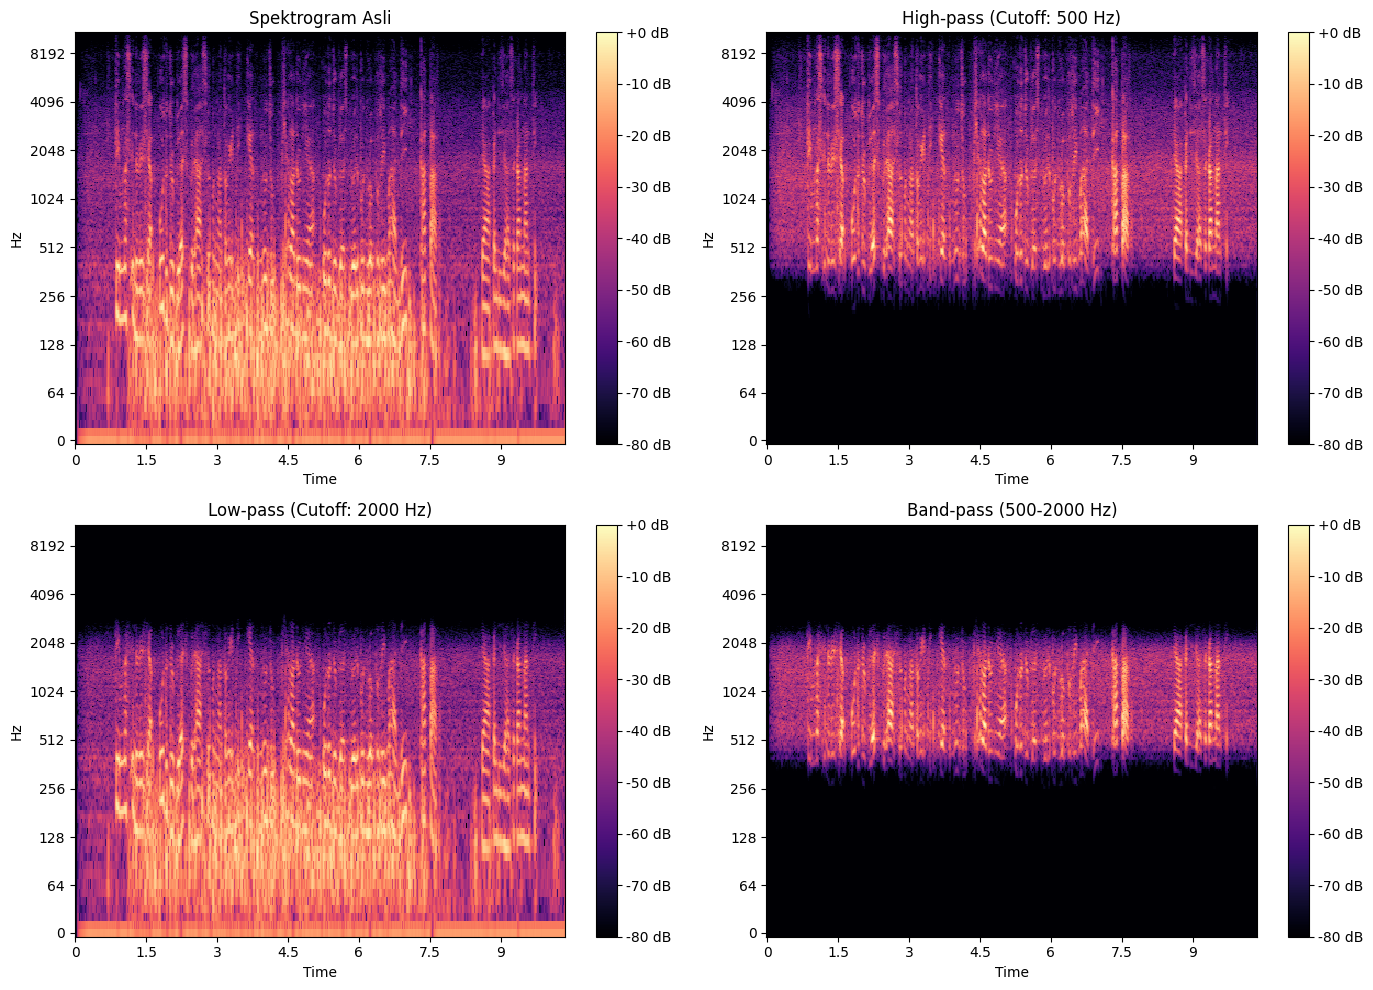

In [76]:
# Membandingkan Hasil Spektogram
plt.figure(figsize=(14, 10))

# Spektogram Asli
plt.subplot(2, 2, 1)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram Asli')

# Spektogram Hasil Highpass Filter
plt.subplot(2, 2, 2)
librosa.display.specshow(D_highpass, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'High-pass (Cutoff: {cutoff_highpass} Hz)')

# Spektogram Hasil Lowpass Filter
plt.subplot(2, 2, 3)
librosa.display.specshow(D_lowpass, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Low-pass (Cutoff: {cutoff_lowpass} Hz)')

# Spektogram Hasil Bandpass Filter
plt.subplot(2, 2, 4)
librosa.display.specshow(D_bandpass, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Band-pass ({cutoff_low_bandpass}-{cutoff_high_bandpass} Hz)')

plt.tight_layout()

output_path = 'Soal3-Visualisasi.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Visualisasi spektrogram telah disimpan di: {output_path}")

plt.show()

### Penjelasan Soal 4
**Jenis Noise yang mungkin muncul** Noise yang muncul pada rekaman audio ini mungkin adalah suara hembusan angin atau rintik hujan karena saat perekaman dilakukan di halaman belakang yang cukup terbuka.
**Filter yang paling efektif** Bandpass filter menjadi salah satu filter yang memberikan hasil paling baik karena berhasil menyisakan audio suara berbicara saja dan menghilangkan noise lain, namun selain itu lowpass juga cukup berefek untuk menghilangkan noise rintik hujan dan hembusan angin yang berfrekuensi rendah.
**Nilai cutoff yang memberikan hasil terbaik** Dengan nilai cutoff saat ini sudah bisa memberikan hasil yang baik yaitu di range cutoff_low_bandpass = 500 cutoff_high_bandpass = 2000 atau 500 - 2000 hz
**Kualitas Suara** Setelah melewati filter output hasil suara sedikit berbunyi terdistorsi karena menghilangkan beberapa frekuensi dari audio namun suara berbicara masih bisa terdengar dengan jelas.

## Soal 4 - Menerapkan **Pitch Shifting**
Pada soal ini diminta untuk mencoba menerapkan pitch shifting pada audio rekaman suara

In [78]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import soundfile as sf

# Load audio file (ganti dengan path file audio Anda)
audio_path = 'Soal1-Audio.wav'
y, sr = librosa.load(audio_path)  # y: sinyal audio, sr: frekuensi sampling

print(f"Frekuensi Sampling (sr): {sr} Hz")
print(f"Durasi Audio: {len(y) / sr:.2f} detik")

Frekuensi Sampling (sr): 22050 Hz
Durasi Audio: 25.63 detik


In [79]:
# Pitch shifting +7
n_steps = 7  # Naikkan nada sebanyak 7 semitones (suara chipmunk)
y_pitch_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)

# Simpan hasil pitch shifting ke file baru (opsional)
output_path = 'Soal4-Audio_pitch7.wav'
sf.write(output_path, y_pitch_shifted, sr)
print(f"Audio hasil pitch shifting telah disimpan di: {output_path}")

Audio hasil pitch shifting telah disimpan di: Soal4-Audio_pitch7.wav


Visualisasi waveform telah disimpan di: Soal4-Waveform_Pitch7.png


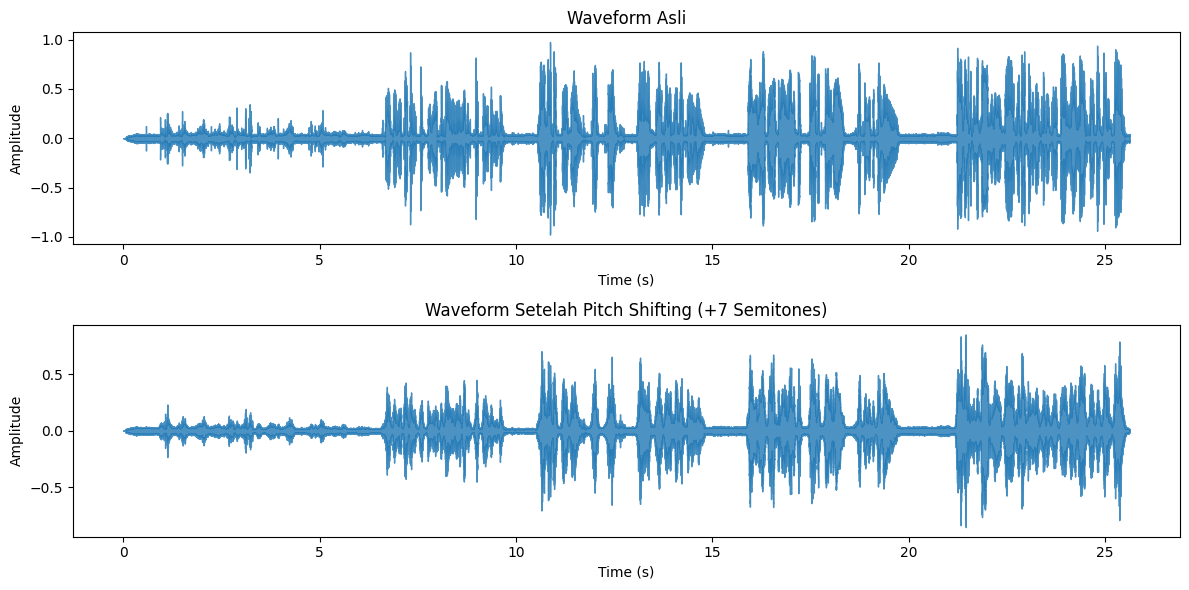

In [80]:
# Plot waveform sebelum dan sesudah pitch shifting +7
plt.figure(figsize=(12, 6))

# Waveform asli
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.8)
plt.title('Waveform Asli')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Waveform setelah pitch shifting
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_pitch_shifted, sr=sr, alpha=0.8)
plt.title(f'Waveform Setelah Pitch Shifting (+{n_steps} Semitones)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()

output_path = 'Soal4-Waveform_Pitch7.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Visualisasi waveform telah disimpan di: {output_path}")

plt.show()

Visualisasi spektrogram telah disimpan di: Soal4-Spektogram_Pitch7.png


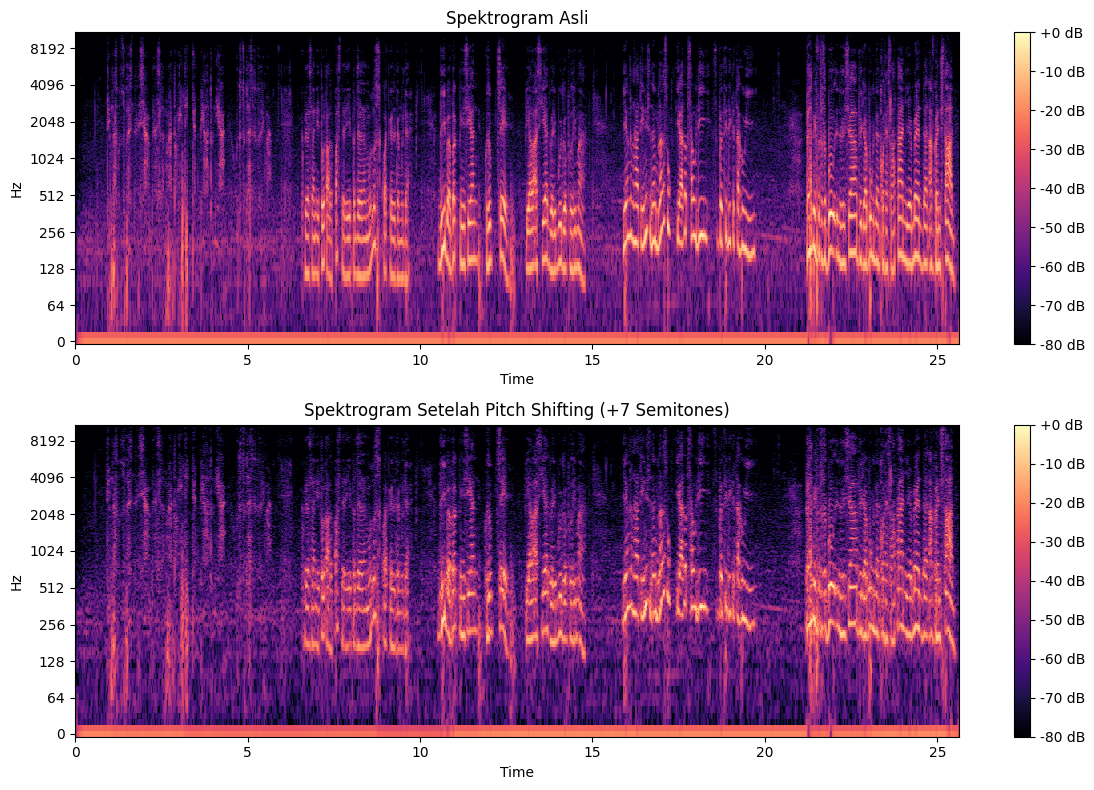

In [81]:
# Plot Spektrogram sebelum dan sesudah pitch shifting +7
# Hitung spektrogram 
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
D_pitch_shifted = librosa.amplitude_to_db(np.abs(librosa.stft(y_pitch_shifted)), ref=np.max)

# Plot spektrogram sebelum dan sesudah pitch shifting
plt.figure(figsize=(12, 8))

# Spektrogram asli
plt.subplot(2, 1, 1)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram Asli')

# Spektrogram setelah pitch shifting
plt.subplot(2, 1, 2)
librosa.display.specshow(D_pitch_shifted, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spektrogram Setelah Pitch Shifting (+{n_steps} Semitones)')

plt.tight_layout()

output_path = 'Soal4-Spektogram_Pitch7.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Visualisasi spektrogram telah disimpan di: {output_path}")

plt.show()

### Penjelasan Pitch Shifting +7
Untuk melakukan pitch shifting dilakukan dengan melalui *syntax n_steps = 7* untuk menaikan nada sebanyak 7 step yang selanjutnya menggunakan y_pitch_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps) untuk menjalankan library dalam melakukan pitch shifting. Dari hasil output waveform bisa dilihat cukup jelas perbedaan waveform sebelum dan sesudah dilakukan pitch shifting. Audio yang telah dilakukan pitch shifting +7 masih bisa terdengar cukup jelas.

In [82]:
# Pitch shifting +12
n_steps = 12  # Naikkan nada sebanyak 6 semitones (suara chipmunk)
y_pitch_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)

# Simpan hasil pitch shifting ke file baru (opsional)
output_path = 'Soal4-Audio_pitch12.wav'
sf.write(output_path, y_pitch_shifted, sr)
print(f"Audio hasil pitch shifting telah disimpan di: {output_path}")

Audio hasil pitch shifting telah disimpan di: Soal4-Audio_pitch12.wav


Visualisasi Waveform telah disimpan di: Soal4-Waveform_Pitch12.png


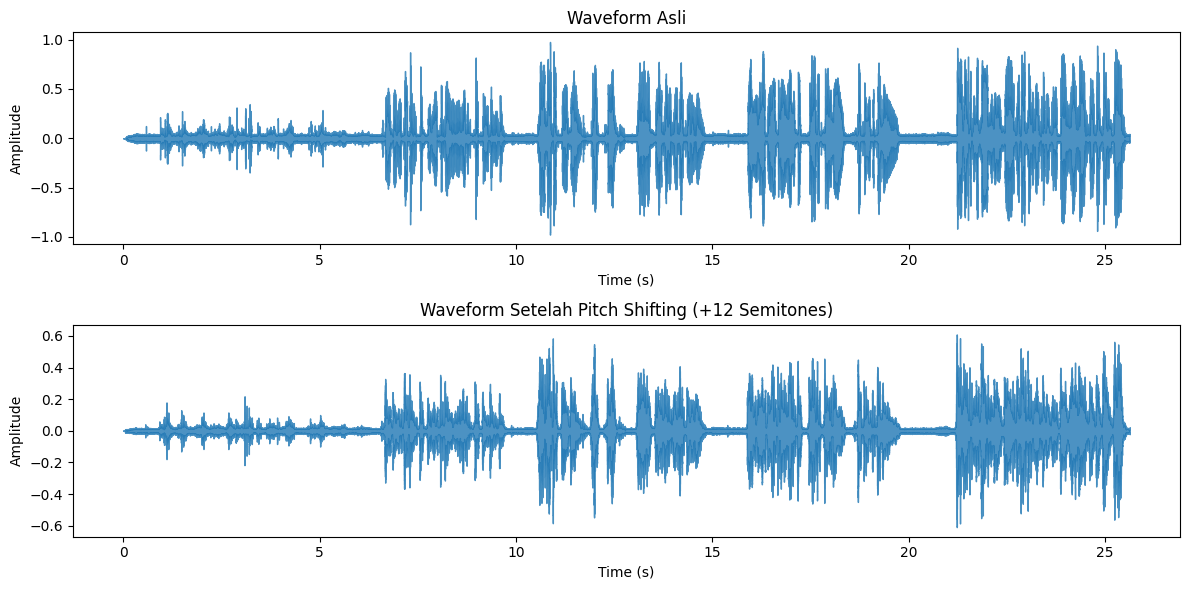

In [83]:
# Plot waveform sebelum dan sesudah pitch shifting +12
plt.figure(figsize=(12, 6))

# Waveform asli
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.8)
plt.title('Waveform Asli')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Waveform setelah pitch shifting
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_pitch_shifted, sr=sr, alpha=0.8)
plt.title(f'Waveform Setelah Pitch Shifting (+{n_steps} Semitones)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()

output_path = 'Soal4-Waveform_Pitch12.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Visualisasi Waveform telah disimpan di: {output_path}")

plt.show()

Visualisasi spektrogram telah disimpan di: Soal4-Spektogram_Pitch12.png


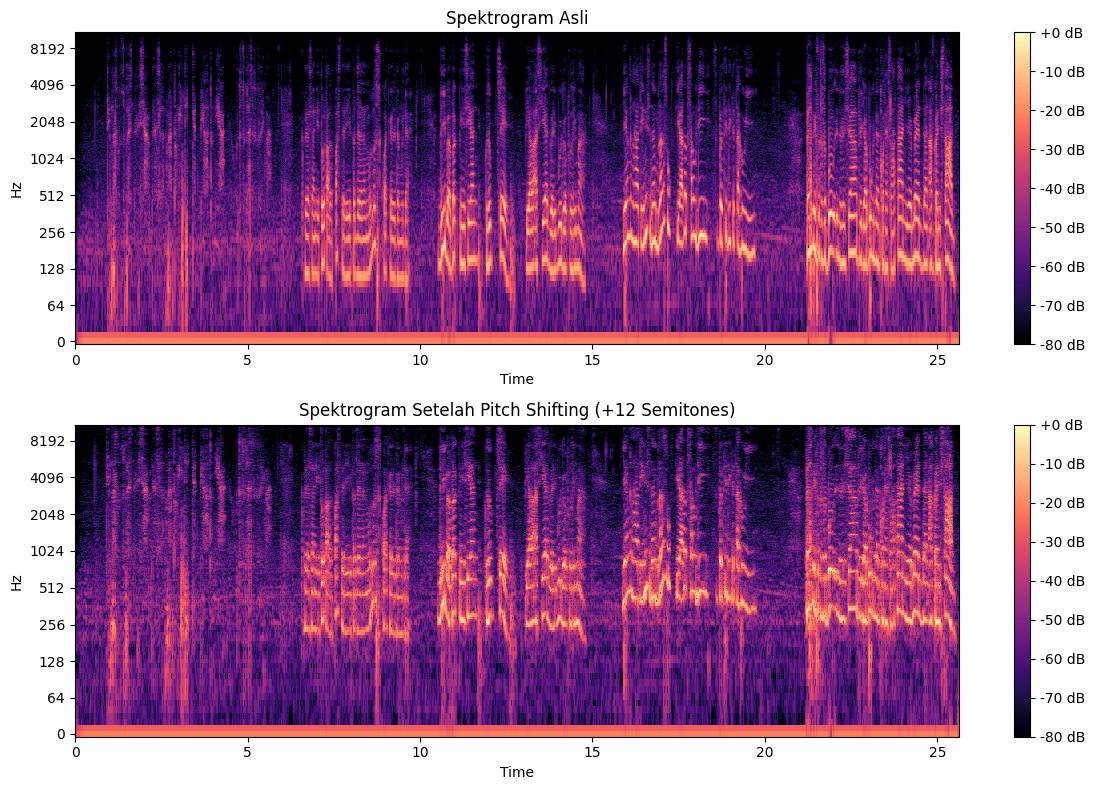

In [84]:
# Plot Spektrogram sebelum dan sesudah pitch shifting +12
# Hitung spektrogram 
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
D_pitch_shifted = librosa.amplitude_to_db(np.abs(librosa.stft(y_pitch_shifted)), ref=np.max)

# Plot spektrogram sebelum dan sesudah pitch shifting
plt.figure(figsize=(12, 8))

# Spektrogram asli
plt.subplot(2, 1, 1)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram Asli')

# Spektrogram setelah pitch shifting
plt.subplot(2, 1, 2)
librosa.display.specshow(D_pitch_shifted, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spektrogram Setelah Pitch Shifting (+{n_steps} Semitones)')

plt.tight_layout()

output_path = 'Soal4-Spektogram_Pitch12.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Visualisasi spektrogram telah disimpan di: {output_path}")

plt.show()

### Penjelasan Pitch Shifting +12
Untuk melakukan pitch shifting dilakukan seperti cara sebelumnya dengan melalui *syntax n_steps = 12* bedanya menggunakan angka 12 untuk menaikan nada sebanyak 12 step yang selanjutnya menggunakan y_pitch_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps) untuk menjalankan library dalam melakukan pitch shifting. Dari hasil output waveform bisa dilihat cukup jelas perbedaan waveform sebelum dan sesudah dilakukan pitch shifting. Audio yang telah dilakukan pitch shifting +12 masih bisa terdengar jelas walaupun suara yang dikeluarkan sangat tinggi

In [85]:
# Menggabungkan 2 Audio
import librosa
import numpy as np
import soundfile as sf

# Load audio files
audio_path_1 = 'Soal4-Audio_pitch7.wav'  
audio_path_2 = 'Soal4-Audio_pitch12.wav'  

y1, sr1 = librosa.load(audio_path_1, sr=None)  # Pitch +7
y2, sr2 = librosa.load(audio_path_2, sr=None)  # Pitch +12

# Error Handling jika frekuensi berbeda
if sr1 != sr2:
    raise ValueError("Frekuensi sampling kedua file harus sama!")
sr = sr1  # Frekuensi sampling gabungan

In [86]:
# Menggabungkan dua audio secara berurutan (Concatenation)
y_combined = np.concatenate((y1, y2))

# Simpan hasil gabungan ke file baru
output_concatenated_path = 'Soal4-AudioCombined_Concatenation.wav'
sf.write(output_concatenated_path, y_combined, sr)
print(f"Audio hasil penggabungan (concatenation) telah disimpan di: {output_concatenated_path}")

Audio hasil penggabungan (concatenation) telah disimpan di: Soal4-AudioCombined_Concatenation.wav


In [87]:
# Menggabungkan dua audio secara bersamaan (Mixing)
# Pastikan durasi kedua audio sama
min_length = min(len(y1), len(y2))
y1_trimmed = y1[:min_length]
y2_trimmed = y2[:min_length]

# Mix kedua audio
y_mixed = (y1_trimmed + y2_trimmed) / 2  # Normalisasi agar tidak terlalu keras

# Simpan hasil mixing ke file baru
output_mixed_path = 'Soal4-AudioCombined_Mixed.wav'
sf.write(output_mixed_path, y_mixed, sr)
print(f"Audio hasil penggabungan (mixing) telah disimpan di: {output_mixed_path}")

Audio hasil penggabungan (mixing) telah disimpan di: Soal4-AudioCombined_Mixed.wav


## Soal 5 - Melakukan **Normalisasi dan Loudness Optimization**
Pada soal ini diminta untuk melakukan normalisasi dan loudness optimization dari output audio yang telah dilakukan pitch shifting sebelumnya. Dalam hal ini dilakukan dengan menggunakan hasil output audio pitch shifting +12 **Soal4-Audio_pitch12.wav**

In [89]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from pydub import AudioSegment

# Load audio file (ganti dengan path file audio Anda)
audio_path = 'Soal4-Audio_pitch12.wav'
y, sr = librosa.load(audio_path, sr=None)  # y: sinyal audio, sr: frekuensi sampling

print(f"Frekuensi Sampling (sr): {sr} Hz")
print(f"Durasi Audio: {len(y) / sr:.2f} detik")

Frekuensi Sampling (sr): 22050 Hz
Durasi Audio: 25.63 detik


In [90]:
# Normalisasi Peak
from pydub import AudioSegment

def normalize_peak(input_file, output_file, target_peak_db=0):
    # Load audio menggunakan pydub
    audio = AudioSegment.from_file(input_file)

    # Hitung gain yang diperlukan untuk mencapai target peak
    current_peak_db = audio.max_dBFS  # Amplitudo maksimum dalam dBFS
    gain_needed = target_peak_db - current_peak_db
    print(f"Gain yang diperlukan untuk normalisasi peak: {gain_needed:.2f} dB")

    # Terapkan gain
    normalized_audio = audio + gain_needed

    # Simpan hasil normalisasi
    normalized_audio.export(output_file, format="wav")
    print(f"Audio hasil normalisasi peak telah disimpan di: {output_file}")

# Jalankan normalisasi peak
normalized_peak_output_path = 'Soal5-Audio_NormalisasiPeak.wav'
normalize_peak(audio_path, normalized_peak_output_path)

Gain yang diperlukan untuk normalisasi peak: 4.31 dB
Audio hasil normalisasi peak telah disimpan di: Soal5-Audio_NormalisasiPeak.wav


### Penjelasan Normalisasi Peak
Normalisasi peak dilakuakan dengan mengubah gain audio menjadi default atau mencapai amplitudo maksimum dalam dBFS yaitu 0, sebelum dilakukan normalisasi dilakukan perhitungan gain dulu yang diperlukan untuk mencapai default, baru setelah itu dilakukan normalisasi. Audio yang dihasilkan masih cukup baik dan bisa didengar namun masih sedikit kurang.

In [91]:
# Normalisasi LUFS (Loudness Optimization)
import librosa
import pyloudnorm as pyln

def calculate_loudness_pyloudnorm(file_path, sr=44100):
    try:
        # Load audio menggunakan librosa
        y, sr = librosa.load(file_path, sr=sr)

        # Inisialisasi meter loudness
        meter = pyln.Meter(sr)  # Create BS.1770 meter
        loudness = meter.integrated_loudness(y)
        return loudness
    except Exception as e:
        print(f"Error calculating loudness: {e}")
        return None

# Contoh penggunaan
audio_path = 'Soal4-Audio_pitch12.wav'
lufs = calculate_loudness_pyloudnorm(audio_path)
if lufs is not None:
    print(f"Loudness Awal: {lufs:.2f} LUFS")
else:
    print("Gagal menghitung loudness.")

Loudness Awal: -21.62 LUFS


In [92]:
def normalize_lufs(input_file, output_file, target_lufs=-18):
    # Hitung loudness awal
    current_lufs = calculate_loudness_pyloudnorm(input_file)
    if current_lufs is None:
        raise ValueError("Gagal menghitung loudness awal.")
    
    # Hitung gain yang diperlukan untuk mencapai target LUFS
    gain_needed = target_lufs - current_lufs
    print(f"Gain yang diperlukan untuk normalisasi LUFS: {gain_needed:.2f} dB")

    # Load audio menggunakan pydub
    audio = AudioSegment.from_file(input_file)

    # Terapkan gain
    normalized_audio = audio + gain_needed

    # Simpan hasil normalisasi
    normalized_audio.export(output_file, format="wav")
    print(f"Audio hasil normalisasi LUFS telah disimpan di: {output_file}")

normalized_lufs_output_path = 'Soal5-Audio_NormalisasiLUFS.wav'
normalize_lufs(audio_path, normalized_lufs_output_path)

Gain yang diperlukan untuk normalisasi LUFS: 3.62 dB
Audio hasil normalisasi LUFS telah disimpan di: Soal5-Audio_NormalisasiLUFS.wav


### Penjelasan Normallisasi LUFS
Normalisasi LUFS dilakuakan dengan mengubah gain atau loudness dari audio dengan target tertentu dalam hal ini -18 db dengan standar LUFS, sebelum dilakukan normalisasi dilakukan perhitungan gain dulu yang diperlukan untuk mencapai target yang diinginkan, baru setelah itu dilakukan normalisasi. Audio yang dihasilkan terbilang lebih baik dari normalisasi peak dengan hasil yang lebih lembut daripada normalisasi peak

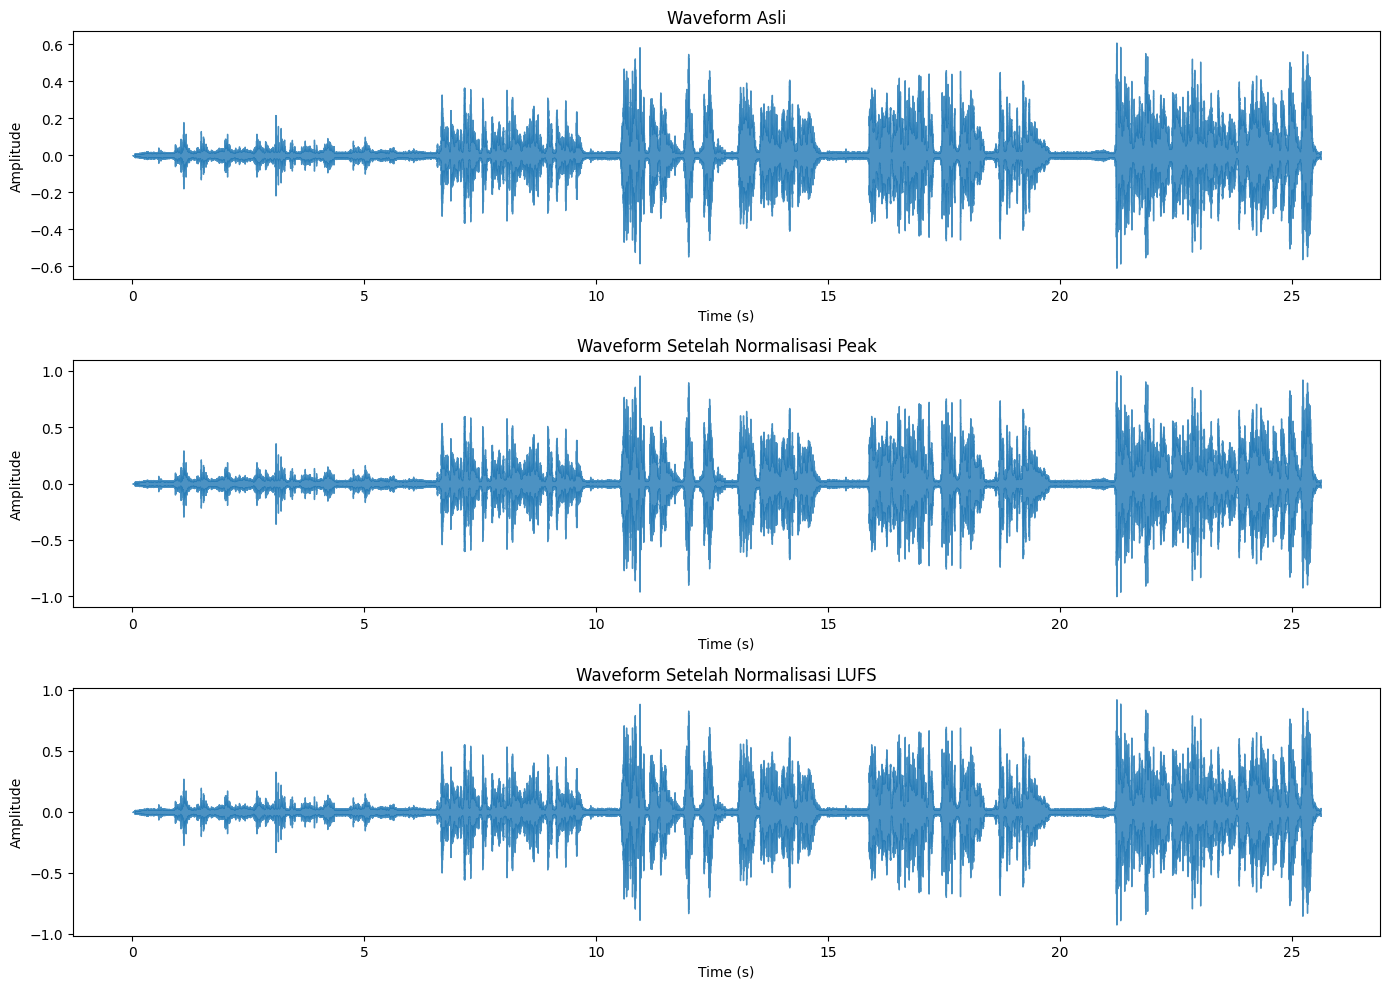

Visualisasi spektrogram telah disimpan di: Soal5-Visualisasi.png


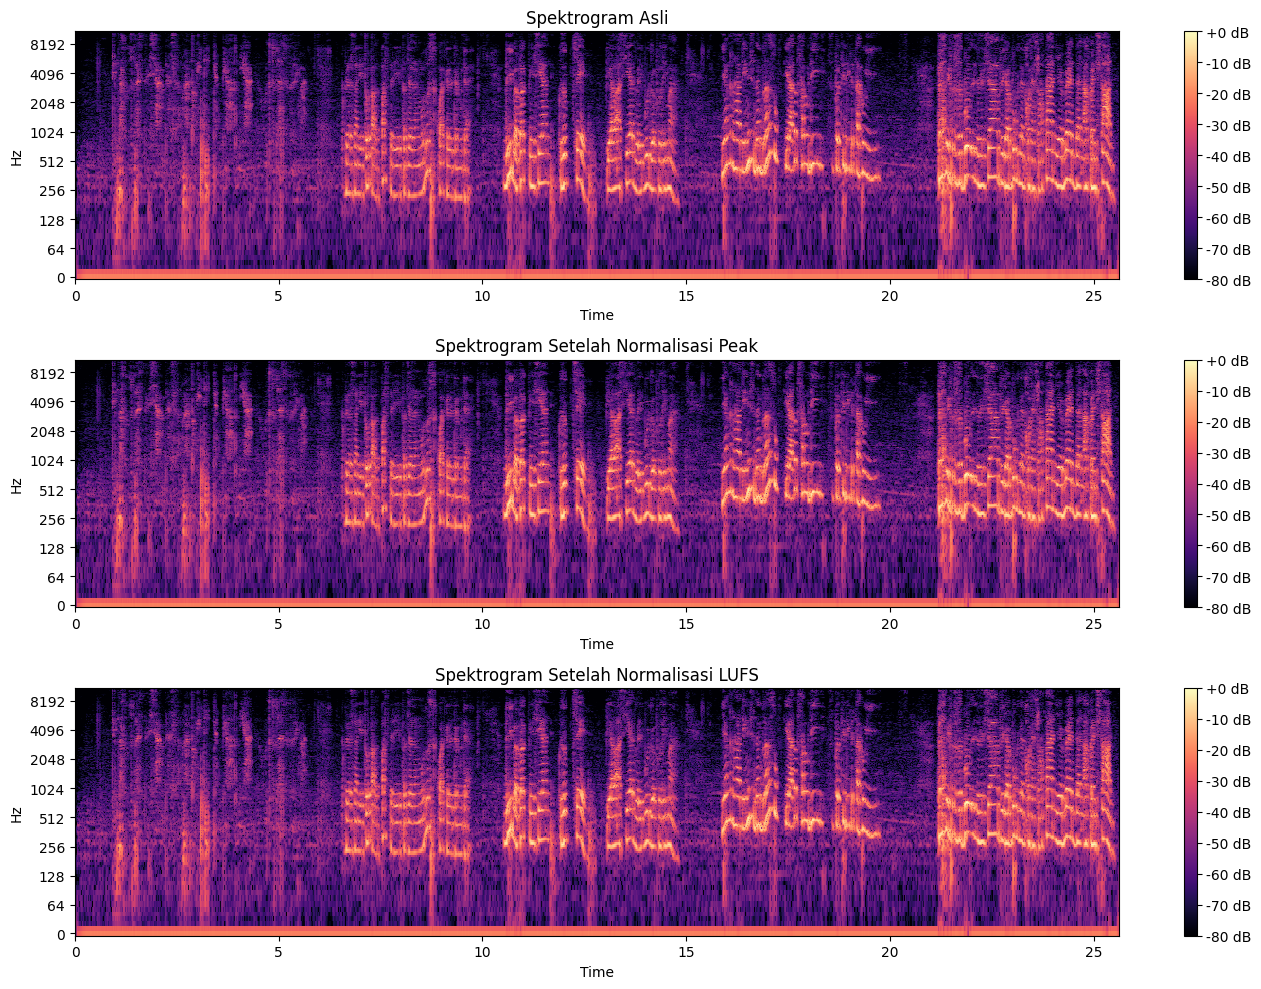

In [93]:
# Muat audio hasil normalisasi
y_peak, _ = librosa.load(normalized_peak_output_path, sr=sr)
y_lufs, _ = librosa.load(normalized_lufs_output_path, sr=sr)

# Plot waveform sebelum dan sesudah normalisasi
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.8)
plt.title('Waveform Asli')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
librosa.display.waveshow(y_peak, sr=sr, alpha=0.8)
plt.title('Waveform Setelah Normalisasi Peak')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
librosa.display.waveshow(y_lufs, sr=sr, alpha=0.8)
plt.title('Waveform Setelah Normalisasi LUFS')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Plot spektrogram
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
D_peak = librosa.amplitude_to_db(np.abs(librosa.stft(y_peak)), ref=np.max)
D_lufs = librosa.amplitude_to_db(np.abs(librosa.stft(y_lufs)), ref=np.max)

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram Asli')

plt.subplot(3, 1, 2)
librosa.display.specshow(D_peak, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram Setelah Normalisasi Peak')

plt.subplot(3, 1, 3)
librosa.display.specshow(D_lufs, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram Setelah Normalisasi LUFS')

plt.tight_layout()

output_path = 'Soal5-Visualisasi.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Visualisasi spektrogram telah disimpan di: {output_path}")

plt.show()